In [1]:
import pandas as pd
import numpy as np
from scipy import spatial
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
import fiona
import statistics
import contextily as cx

In [2]:
mypath = '/home/selihadji/Documenti/papers/Platoon_II/trips/'

In [3]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [4]:
def filterSubstr(lists, substr):
    return [x for x in lists if substr in x]

searchString = '2022_09_15'
onlyfiles_15_09 = filterSubstr(onlyfiles, searchString)
onlyfiles_15_09

searchString1 = '11_38'
onlyfiles = filterSubstr(onlyfiles_15_09, searchString1)
onlyfiles

#searchString2 = '09_11_09'
#onlyfiles2 = filterSubstr(onlyfiles_15_09, searchString2)
#onlyfiles = onlyfiles1 + onlyfiles2
#onlyfiles

['2022_09_15_RG Logi Jeep_11_38_11_57_eeacb307-cbe3-4d36-b31b-a9eded8dabf0.csv',
 '2022_09_15_PS Skylark Test_11_38_11_57_9260a294-5c51-41ea-8a7c-eb6c7c7aacd1.csv',
 '2022_09_15_RW2 Logi Jeep_11_38_11_57_6d8c0c1d-6299-4bbd-959b-d05c75156c1b.csv']

In [5]:
allfiles = []
for i in range(len(onlyfiles)):
    df = pd.read_csv(mypath + str(onlyfiles[i]), sep=';', decimal=',')
    df['Time[ms]'] = pd.to_datetime(df['Time[ms]'], unit='ms')
    df['driver'] = str(onlyfiles[i])[11:13]
    coord_ = [Point(x, y) for x, y in zip(df.Longitude, df.Latitude)]
    alldata_ = gpd.GeoDataFrame(df, geometry=coord_, crs ="EPSG:4326")
    allfiles.append(df)
alldata = pd.concat(allfiles, axis=0).reset_index(drop=True)

In [6]:
alldata['data'] = alldata['Time[ms]'].dt.date

In [7]:
alldata["data"] = pd.to_datetime(alldata["data"])

In [8]:
alldata_RG = alldata[alldata.driver == 'RG']
alldata_PS = alldata[alldata.driver == 'PS']
alldata_RW = alldata[alldata.driver == 'RW']

In [9]:
allfiles = []
for i in range(len(onlyfiles)):
    df = pd.read_csv(mypath + str(onlyfiles[i]), sep=';', decimal=',')
    df['Time[ms]'] = pd.to_datetime(df['Time[ms]'], unit='ms')
    df['driver'] = str(onlyfiles[i])[11:13]
    coord_ = [Point(x, y) for x, y in zip(df.Longitude, df.Latitude)]
    alldata_ = gpd.GeoDataFrame(df, geometry=coord_, crs ="EPSG:4326")
    allfiles.append(df)

In [10]:
alldata = pd.concat(allfiles, axis=0).reset_index(drop=True)

In [11]:
alldata.driver.unique()

array(['RG', 'PS', 'RW'], dtype=object)

In [12]:
alldata_SORTED = alldata.sort_values(by = 'Time[ms]').reset_index(drop=True)

In [13]:
alldata_SORTED.head(100)

,Time[ms],Latitude,Longitude,Speed[m/s],Distance,Altitude[m],Flag,Acceleration[m/s^2],AccWork[J],AeroWork[J],...,TotalWork[J],StandStillTime[s],Fuel[l],CO2[kg],AccECE[%],AeroECE[%],STSECE[%],WorkECE[%],driver,geometry
0,2022-09-15 11:38:17.000,53.555795,9.972914,2.390000,NaN,60.80,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RG,POINT (9.97291 53.55580)
1,2022-09-15 11:38:18.000,53.555782,9.972946,3.190000,3.190000,60.80,0,0.800000,2912.0,15.0,...,3539.0,0.0,0.000396,0.001056,300.000000,11.151863,0.000000,11.915299,RG,POINT (9.97295 53.55578)
2,2022-09-15 11:38:19.000,53.555753,9.972981,4.680000,4.680000,60.80,0,1.490000,7651.0,49.0,...,8598.0,0.0,0.000963,0.002566,300.000000,18.793707,0.000000,39.019924,RG,POINT (9.97298 53.55575)
3,2022-09-15 11:38:20.000,53.555773,9.972914,1.430000,NaN,60.90,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RW,POINT (9.97291 53.55577)
4,2022-09-15 11:38:20.000,53.555712,9.973017,5.550000,5.550000,60.80,0,0.870000,5807.0,81.0,...,6953.0,0.0,0.000779,0.002075,300.000000,24.981573,0.000000,58.313342,RG,POINT (9.97302 53.55571)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2022-09-15 11:39:15.000,53.555424,9.974188,9.810000,9.810000,61.50,0,0.830000,15548.0,600.0,...,19026.0,0.0,0.002131,0.005677,297.137555,37.799657,65.215255,160.889005,RW,POINT (9.97419 53.55542)
96,2022-09-15 11:39:15.700,53.555712,9.974411,8.180556,16.361111,23.67,0,-0.323611,-7183.0,525.0,...,0.0,0.0,0.000000,0.000000,273.893605,54.162571,0.000000,110.159184,PS,POINT (9.97441 53.55571)
97,2022-09-15 11:39:16.000,53.555507,9.974265,10.380000,10.380000,61.50,0,0.570000,11473.0,711.0,...,15229.0,0.0,0.001706,0.004544,299.359841,43.036371,64.050697,167.335751,RW,POINT (9.97427 53.55551)
98,2022-09-15 11:39:16.000,53.555718,9.974459,8.270000,8.270000,61.00,0,-0.190000,-2075.0,271.0,...,0.0,0.0,0.000000,0.000000,182.023782,40.552800,75.098324,120.306836,RG,POINT (9.97446 53.55572)


In [14]:
alldata_SORTED_cut = alldata_SORTED.iloc[30:].dropna().reset_index(drop=True)

In [15]:
alldata_SORTED_cut['Time'] = pd.to_datetime(alldata_SORTED_cut['Time[ms]'].dt.strftime('%H:%M:%S'))

In [16]:
rw = alldata_SORTED_cut[alldata_SORTED_cut.driver == 'RW'].reset_index(drop=True).drop_duplicates()
rg = alldata_SORTED_cut[alldata_SORTED_cut.driver == 'RG'].reset_index(drop=True).drop_duplicates()
ps = alldata_SORTED_cut[alldata_SORTED_cut.driver == 'PS'].reset_index(drop=True).drop_duplicates()

In [17]:
from haversine import haversine, Unit
import haversine as hs

In [18]:
platoon_alldist = []
platoon_all_CO2 = []

platoon_all_lat_dist = []
platoon_all_lon_dist = []

platoon_all_lat_CO2 = []
platoon_all_lon_CO2 = []

#rw
#rg
#ps


for i in range(len(rw)):
    platoon_lat_dist = []
    platoon_lon_dist = []
    platoon_lat_CO2 = []
    platoon_lon_CO2 = []
    platoon_dist = []
    CO2_max = []
    dist_mat = []
    
    rw_ = rw.iloc[i]
    
    df_array1 = (rw_.Latitude, rw_.Longitude)

    rg_ = rg[rg['Time'] > rw_['Time']].reset_index(drop=True)
    df_array2 = list(zip(rg_.Latitude, rg_.Longitude))[0:60]
        
    for j in range(len(df_array2)):
        dist_mat.append(hs.haversine(df_array1,df_array2[j],unit=Unit.METERS))

    rg_mindist = min(dist_mat)
    rg_mindist_index = dist_mat.index(rg_mindist)

    platoon_dist.append(rg_mindist)

    platoon_lat_dist.append(rg_.iloc[rg_mindist_index]["Latitude"])
    platoon_lon_dist.append(rg_.iloc[rg_mindist_index]["Longitude"])

    CO2 = []
    CO2.append(rg_.iloc[0]['CO2[kg]'])
    try:
        CO2.extend(list(rg_.iloc[1:21]['CO2[kg]']))
    except:
        pass
    
    rg_maxCO2 = max(CO2)
    rg_maxCO2_index = CO2.index(rg_maxCO2)
    CO2_max.append(rg_.reset_index(drop=True).iloc[rg_maxCO2_index]['CO2[kg]'])
    platoon_lat_CO2.append(rg_.reset_index(drop=True).iloc[rg_maxCO2_index]["Latitude"])
    platoon_lon_CO2.append(rg_.reset_index(drop=True).iloc[rg_maxCO2_index]["Longitude"])    


    ps_ = ps[ps['Time'] > rg_['Time'][rg_mindist_index]].reset_index(drop=True)
    df_array3 = list(zip(ps_.Latitude, ps_.Longitude))[0:60]        
    
    dist_mat = []

    for j in range(len(df_array3)):
        dist_mat.append(hs.haversine(df_array2[rg_mindist_index],df_array3[j],unit=Unit.METERS))

    ps_mindist = min(dist_mat)
    ps_mindist_index = dist_mat.index(ps_mindist)

    platoon_dist.append(ps_mindist)
    platoon_lat_dist.append(ps_.reset_index(drop=True).iloc[ps_mindist_index]["Latitude"])
    platoon_lon_dist.append(ps_.reset_index(drop=True).iloc[ps_mindist_index]["Longitude"])    

    CO2 = []

    CO2.append(ps_.iloc[0]['CO2[kg]'])
    try:
        CO2.extend(list(ps_.iloc[1:21]['CO2[kg]']))
    except:
        pass
    ps_maxCO2 = max(CO2)
    ps_maxCO2_index = CO2.index(ps_maxCO2)
    CO2_max.append(ps_.reset_index(drop=True).iloc[ps_maxCO2_index]['CO2[kg]'])
    platoon_lat_CO2.append(ps_.reset_index(drop=True).iloc[ps_maxCO2_index]["Latitude"])
    platoon_lon_CO2.append(ps_.reset_index(drop=True).iloc[ps_maxCO2_index]["Longitude"])  

      
    platoon_all_lat_dist.append(platoon_lat_dist)
    platoon_all_lon_dist.append(platoon_lon_dist)
    platoon_all_lat_CO2.append(platoon_lat_CO2)
    platoon_all_lon_CO2.append(platoon_lon_CO2)
    platoon_alldist.append(platoon_dist)
    platoon_all_CO2.append(CO2_max)

ValueError: min() arg is an empty sequence

<Axes: >

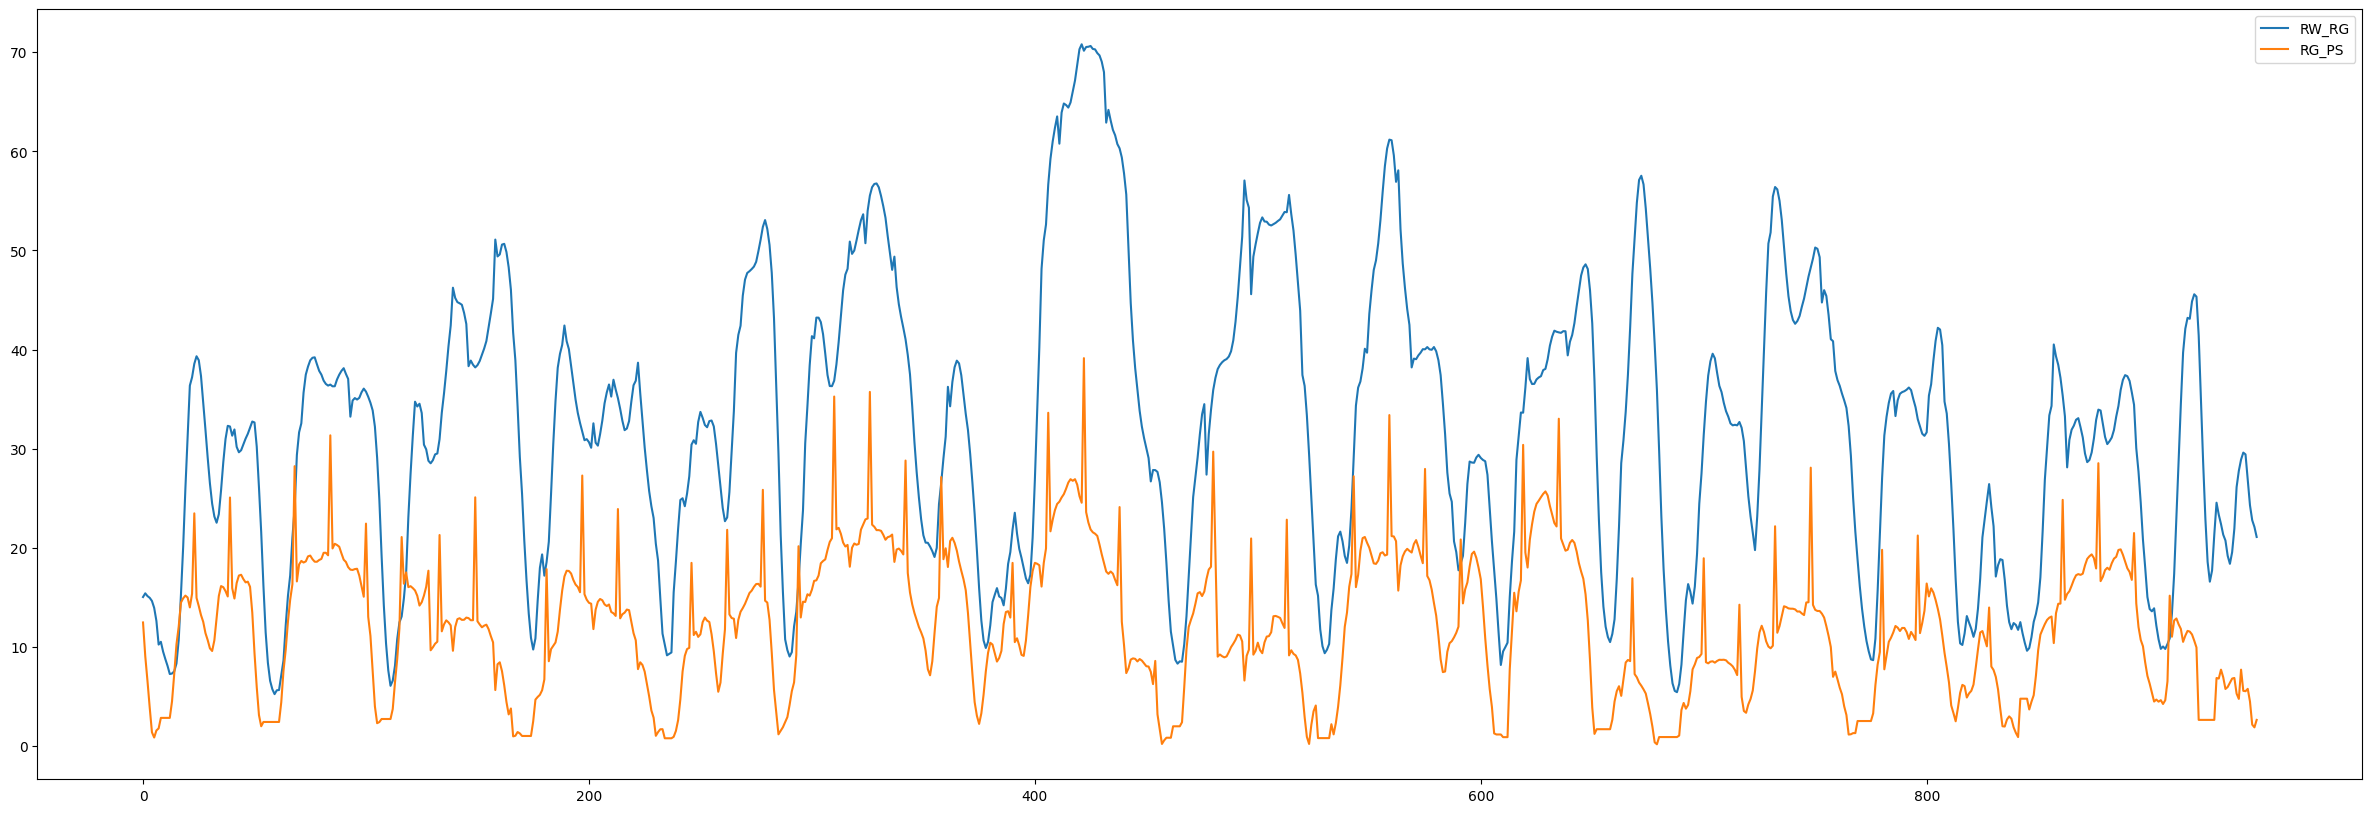

In [20]:
pd.DataFrame(platoon_alldist, columns = ['RW_RG', 'RG_PS']).plot(figsize=(30,10))

In [21]:
dist_v = pd.DataFrame(platoon_alldist, columns = ['RW_RG', 'RG_PS'])
pd.DataFrame(platoon_alldist, columns = ['RW_RG', 'RG_PS']).to_csv('distance_platoon.csv', index=False)

In [22]:
dist_coord = pd.concat([pd.DataFrame(platoon_all_lat_dist, columns=['v1_lat', 'v2_lat'])['v1_lat'], pd.DataFrame(platoon_all_lon_dist, columns=['v1_lon', 'v2_lon'])['v1_lon'],pd.DataFrame(platoon_all_lat_dist, columns=['v1_lat', 'v2_lat'])['v2_lat'], pd.DataFrame(platoon_all_lon_dist, columns=['v1_lon', 'v2_lon'])['v2_lon']], axis=1)

In [23]:
pd.concat([pd.DataFrame(platoon_all_lat_dist, columns=['v1_lat', 'v2_lat'])['v1_lat'], pd.DataFrame(platoon_all_lon_dist, columns=['v1_lon', 'v2_lon'])['v1_lon'],pd.DataFrame(platoon_all_lat_dist, columns=['v1_lat', 'v2_lat'])['v2_lat'], pd.DataFrame(platoon_all_lon_dist, columns=['v1_lon', 'v2_lon'])['v2_lon']], axis=1).to_csv('platoon_distances_coord.csv', index=False)

In [24]:
infr = pd.read_csv('/home/selihadji/Documenti/papers/Platoon_II/infrast_data_update_.csv', sep=';')
infr.what.unique()

array(['Turn_left', '4-ways intersection', 'Traffic_light', 'Curve',
       'Road_immission', 'Turn_right'], dtype=object)

In [25]:
allveic = []
for k in range(0, len(dist_coord.columns)-1, 2):
    veic = []
    for i in range(len(dist_coord)):
        infra = []
        for j in range(len(infr)):
            inf = (infr.iloc[j].lon,infr.iloc[j].lat)
            distcoor = (dist_coord.iloc[i][str(dist_coord.columns[k+1])], dist_coord.iloc[i][str(dist_coord.columns[k])])
            infra.append(hs.haversine(inf,distcoor,unit=Unit.METERS))
        veic.append(infra)
    allveic.append(veic)

In [26]:
v1 = pd.DataFrame(allveic[0])
v2 = pd.DataFrame(allveic[1])

In [27]:
allfeat = []
for i in range(len(v1)): 
    allfeat.append(list(v1[v1<500].iloc[i].dropna()))
new_v1 = pd.DataFrame(allfeat).iloc[:,0:7].fillna(0)

In [28]:
allfeat = []
for i in range(len(v2)): 
    allfeat.append(list(v2[v2<500].iloc[i].dropna()))
new_v2 = pd.DataFrame(allfeat).iloc[:,0:7].fillna(0)

In [29]:
v1.columns = infr.what
v2.columns = infr.what

In [30]:
vlist = []
vlist.append(v1)
vlist.append(v2)

In [31]:
import statsmodels.api as sm

In [32]:
all_X = []
all_y = []

for k in range(len(vlist)):
    feats = []
    v = vlist[k]
    infrast = v.idxmin(axis=1)
    for i in range(len(v)):
        if (v.iloc[i][str(infrast[i])] < 80).any():
            feats.append([infrast[i]])
        else:
            feats.append([])
    new_v = pd.get_dummies(pd.DataFrame(feats), prefix='Feat')

    X = new_v.copy()
    y = dist_v[str(dist_v.columns[k])]
    X['old_dist'] = dist_v[str(dist_v.columns[k])].shift(10).fillna(0)
    all_X.append(X)
    all_y.append(y)

all_X_ = pd.concat(all_X).reset_index(drop=True).fillna(0)
all_y_ = pd.concat(all_y).reset_index(drop=True).fillna(0)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  RG_PS   R-squared (uncentered):                   0.716
Model:                            OLS   Adj. R-squared (uncentered):              0.715
Method:                 Least Squares   F-statistic:                              397.0
Date:                Tue, 01 Aug 2023   Prob (F-statistic):                   5.00e-254
Time:                        09:41:29   Log-Likelihood:                         -3241.2
No. Observations:                 949   AIC:                                      6494.
Df Residuals:                     943   BIC:                                      6524.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Feat_4-ways intersection     2.1404      2.793      0.766      0.444      -3.342       7.622
Feat_Road_immission          9.3215      1.384      6.737      0.000       6.606      12.037
Feat_Traffic_light           1.3853      0.440      3.152      0.002       0.523       2.248
Feat_Turn_left               3.3964      0.940      3.615      0.000       1.552       5.240
Feat_Turn_right              1.5810      0.971      1.627      0.104      -0.326       3.488
old_dist                     0.7676      0.023     33.403      0.000       0.722       0.813
==============================================================================
Omnibus:                        1.887   Durbin-Watson:                   0.371
Prob(Omnibus):                  0.389   Jarque-Bera (JB):                1.743
Skew:                           0.081   Prob(JB):                        0.418
Kurtosis:                       3.133   Cond. No.                         161.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
results_summary = model.summary()
df = pd.DataFrame.from_records(results_summary.tables[1].data)
header = df.iloc[0]
df = df[1:] # take the data less the header row
df.columns = header
df.to_csv('platoon_II_15_09_11_38.csv')

In [34]:
platoon_all_CO2_ = pd.DataFrame(platoon_all_CO2, columns = ['RG_LA', 'LA_PS'])
pd.DataFrame(platoon_all_CO2, columns = ['RW_LA', 'LA_PS']).to_csv('CO2_platoon.csv', index=False)

all_X = []
all_y = []

for k in range(len(vlist)):
    feats = []
    v = vlist[k]
    infrast = v.idxmin(axis=1)
    for i in range(len(v)):
        if (v.iloc[i][str(infrast[i])] <80).any():
            feats.append([infrast[i]])
        else:
            feats.append([])
    new_v = pd.get_dummies(pd.DataFrame(feats), prefix='Feat')

    X = new_v.copy()
    y = platoon_all_CO2_[str(platoon_all_CO2_.columns[k])]
    X['old_dist'] = dist_v[str(dist_v.columns[k])].shift(10).fillna(0)
    all_X.append(X)
    all_y.append(y)

all_X_ = pd.concat(all_X).reset_index(drop=True).fillna(0)
all_y_ = pd.concat(all_y).reset_index(drop=True).fillna(0)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  LA_PS   R-squared (uncentered):                   0.646
Model:                            OLS   Adj. R-squared (uncentered):              0.644
Method:                 Least Squares   F-statistic:                              286.9
Date:                Tue, 01 Aug 2023   Prob (F-statistic):                   9.97e-209
Time:                        09:41:30   Log-Likelihood:                          4215.6
No. Observations:                 949   AIC:                                     -8419.
Df Residuals:                     943   BIC:                                     -8390.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Feat_4-ways intersection     0.0045      0.001      4.139      0.000       0.002       0.007
Feat_Road_immission          0.0042      0.001      7.906      0.000       0.003       0.005
Feat_Traffic_light           0.0029      0.000     17.119      0.000       0.003       0.003
Feat_Turn_left               0.0028      0.000      7.657      0.000       0.002       0.003
Feat_Turn_right              0.0038      0.000     10.085      0.000       0.003       0.005
old_dist                     0.0001   8.89e-06     14.354      0.000       0.000       0.000
==============================================================================
Omnibus:                        7.408   Durbin-Watson:                   0.162
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                5.274
Skew:                          -0.016   Prob(JB):                       0.0716
Kurtosis:                       2.636   Cond. No.                         161.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
results_summary = model.summary()
df = pd.DataFrame.from_records(results_summary.tables[1].data)
header = df.iloc[0]
df = df[1:] # take the data less the header row
df.columns = header
df.to_csv('platoon_II_15_09_11_38_CO2.csv')